In [1]:
!pwd

/home/micha/0_Dev/HACKATHON/AI_Cybersecurity_IDS_PoC/analysis/NN


In [14]:
# load the sonar dataset
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from autokeras import StructuredDataClassifier
import tensorflow as tf


# load dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
#dataframe = pd.read_pickle("../data/unsw-small.pickle")
dataframe = pd.read_csv("../data/unsw-small.csv")
del dataframe["Unnamed: 0"]

In [15]:
#df_david = pd.read_pickle("../data/davidsSet.pickle")
df_david = pd.read_csv("../data/davidsSet.csv")
del df_david["Unnamed: 0"]

In [16]:
df_david

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,175548.663295,1,84,17556,702240
1,22339.587606,54456,4956833,0,0
2,22338.790624,10091,607556,1,52
3,457.696056,0,0,187,12244
4,370.978738,219,17119,1,40
...,...,...,...,...,...
475587,0.144119,7,1458,0,0
475588,0.179070,2,80,1,40
475589,0.089327,2,80,1,40
475590,0.359962,9,2192,0,0


In [17]:
df_david['duration'] = [0.0 if isinstance(x,str) else x for x in df_david['duration']]

In [18]:
df_david

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,175548.663295,1,84,17556,702240
1,22339.587606,54456,4956833,0,0
2,22338.790624,10091,607556,1,52
3,457.696056,0,0,187,12244
4,370.978738,219,17119,1,40
...,...,...,...,...,...
475587,0.144119,7,1458,0,0
475588,0.179070,2,80,1,40
475589,0.089327,2,80,1,40
475590,0.359962,9,2192,0,0


In [19]:
#dataframe = dataframe[['dur','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','label']]
#dataframe.rename(columns={"dur": "duration"}, errors="raise", inplace=True)
dataframe

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0.121478,6,258,4,172,0
1,0.649902,14,734,38,42014,0
2,1.623129,8,364,16,13186,0
3,1.681642,12,628,12,770,0
4,0.449454,10,534,6,268,0
...,...,...,...,...,...,...
257668,0.000005,2,104,0,0,0
257669,1.106101,20,18062,8,354,0
257670,0.000000,1,46,0,0,0
257671,0.000000,1,46,0,0,0


In [20]:
#dataframe.to_pickle('unsw-small.pickle')

In [21]:
#del dataframe['Unnamed: 0']
#del dataframe['rate']
#del dataframe['attack_cat']

In [22]:
print(dataframe.shape)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

print(X.shape, y.shape)


(257673, 6)
(257673, 5) (257673,)


In [23]:
X

array([[1.214780e-01, 6.000000e+00, 2.580000e+02, 4.000000e+00,
        1.720000e+02],
       [6.499020e-01, 1.400000e+01, 7.340000e+02, 3.800000e+01,
        4.201400e+04],
       [1.623129e+00, 8.000000e+00, 3.640000e+02, 1.600000e+01,
        1.318600e+04],
       ...,
       [0.000000e+00, 1.000000e+00, 4.600000e+01, 0.000000e+00,
        0.000000e+00],
       [0.000000e+00, 1.000000e+00, 4.600000e+01, 0.000000e+00,
        0.000000e+00],
       [9.000000e-06, 2.000000e+00, 1.040000e+02, 0.000000e+00,
        0.000000e+00]])

In [24]:
# basic data preparation
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)
# separate into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(206138, 5) (51535, 5) (206138,) (51535,)


In [45]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# define the search
search = StructuredDataClassifier(max_trials=30, tuner='random', metrics=[tf.keras.metrics.CategoricalAccuracy(),'accuracy'])

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_classifier/tuner0.json


In [53]:
# perform the search
search.fit(x=X_train, y=y_train, verbose=1)

Trial 1 Complete [00h 01m 25s]
val_accuracy: 0.8446736335754395

Best val_accuracy So Far: 0.8920165300369263
Total elapsed time: 00h 01m 25s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
structured_data...|True              |False             
structured_data...|False             |False             
structured_data...|3                 |2                 
structured_data...|64                |256               
structured_data...|0.5               |0                 
structured_data...|256               |32                
classification_...|0.5               |0                 
optimizer         |adam_weight_decay |adam              
learning_rate     |0.01              |0.001             

Epoch 1/1000
5154/5154 [==============================] - 9s 2ms/step - loss: 0.3844 - categorical_accuracy: 1.0000 - accuracy: 0.8428 - val_loss: 0.5578 - val_categorical_accuracy: 1.0000 - val_accuracy: 0.8556
Epoch 2/1000
5154/5154 [========================

KeyboardInterrupt: 

In [ ]:
# evaluate the model
loss, acc = search.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

In [122]:
# get the best performing model
model = search.export_model()

In [123]:
# summarize the loaded model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [124]:
# save the best performing model to file
model.save('model_AI4Sec', overwrite=True, include_optimizer=True)

INFO:tensorflow:Assets written to: model_AI4Sec/assets


In [125]:
import tensorflow as tf
import keras
import numpy as np

In [126]:
loaded = keras.models.load_model("model_AI4Sec")

In [127]:
loaded.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [128]:
df_david = pd.read_pickle("davidsSet.pickle")
df_david['duration'] = [0.0 if isinstance(x,str) else x for x in df_david['duration']]

In [129]:

data_david = df_david.values
#X, y = data_david[:, :-1], data_david[:, -1]
X = data_david

In [130]:
X[0]

array([1.75548663e+05, 1.00000000e+00, 8.40000000e+01, 1.75560000e+04,
       7.02240000e+05])

In [131]:
from numpy import asarray

In [132]:
X = asarray(X[0]).astype('float32')

In [133]:
yhat = loaded.predict(X_test)
print('Predicted: %.3f' % yhat[0])

Predicted: 1.000


In [26]:
import tensorflow as tf
import keras
import numpy as np
loaded = keras.models.load_model("model_AI4Sec")
loaded.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [34]:
#dfauc = pd.DataFrame(data=rf_auc)
f = open("../model/random_forest_auc.txt", "r")
auc_score = float(f.read())
#auc_score
df_rf_metric = pd.read_pickle("../model/random_forest_metric.pickle")

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
nn_auc = roc_auc_score(y_test, loaded.predict(X_test))
nn_auc



0.9654834318493088

In [58]:
y_pred_keras = loaded.predict(X_test).ravel()
y_pred_keras_1 = loaded.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)



In [52]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(style="ticks", context="talk", rc={'figure.figsize':(10.0,8.00)})
plt.style.use("dark_background")
sns.set_context("talk")
#colormap = sns.color_palette("rocket_r", as_cmap=True)
#colormap = sns.color_palette("YlOrBr", as_cmap=True)
#colormap = sns.color_palette("vlag", as_cmap=True)
#colormap = sns.color_palette("light:b", as_cmap=True)
colormap = sns.color_palette("magma", as_cmap=True)

In [60]:
matrix = tf.math.confusion_matrix(y_test, y_pred_keras_1, num_classes=None, weights=None, dtype=tf.dtypes.int32,name=None)


In [68]:
cm = pd.DataFrame(matrix.numpy(), columns=["predicted no (TN-FN)","predicted yes (FP-TP)"], index=["actual no (TN-FP)","actual yes (FN-TP)"])

In [66]:
testtest = pd.DataFrame()

In [67]:
testtest

,0,1
0,18576,24
1,15066,17869


In [53]:
#cm = pd.DataFrame(confusion_matrix(y_test, loaded.predict(X_test)), columns=["predicted no (TN-FN)","predicted yes (FP-TP)"], index=["actual no (TN-FP)","actual yes (FN-TP)"])

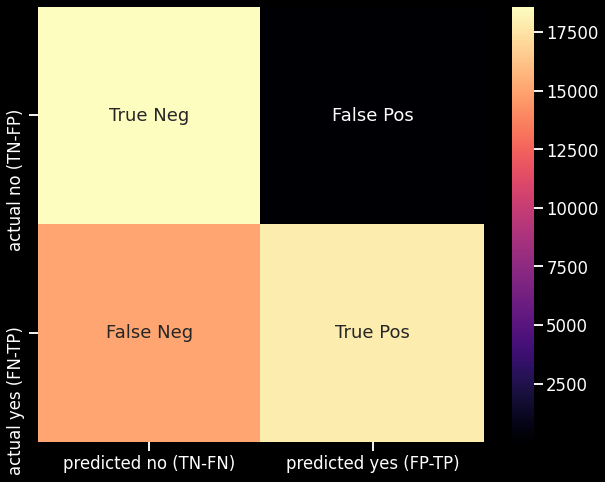

In [69]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
plot = sns.heatmap(cm, annot=labels, fmt='', cmap=colormap)

In [70]:
fig = plot.get_figure()
fig.savefig("../model/nn_confusion_matrix.png")

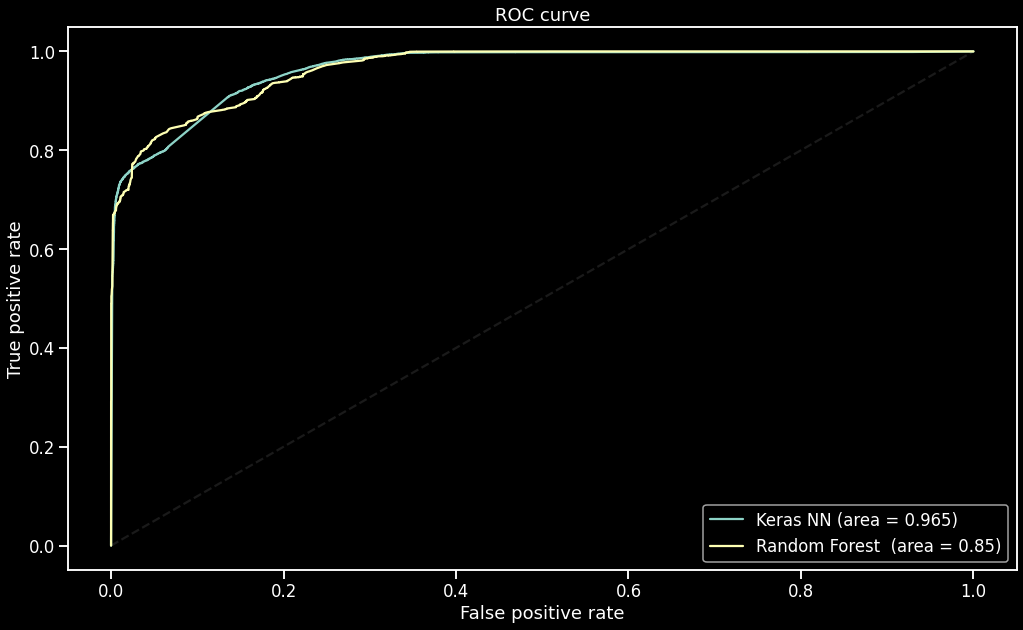

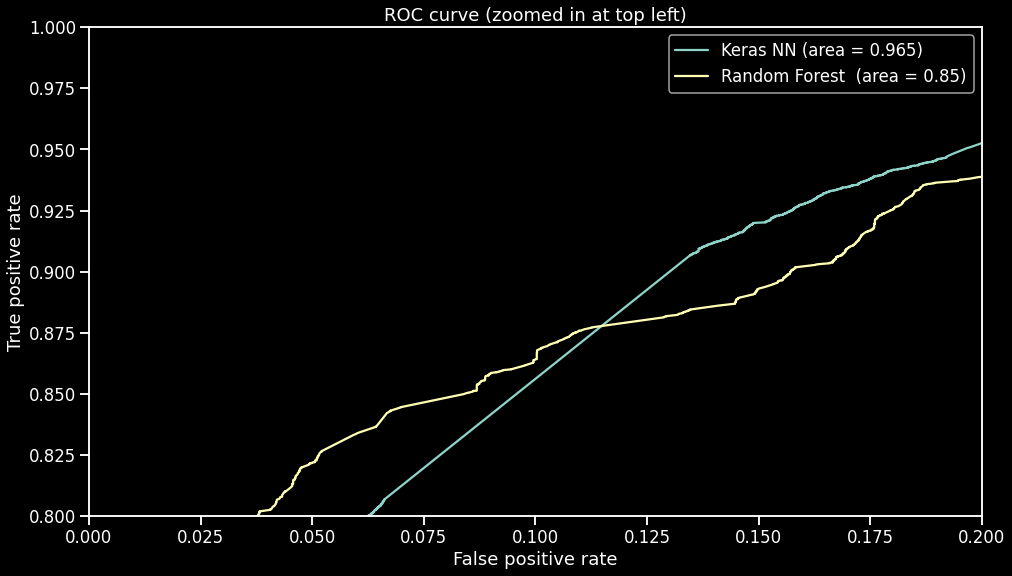

In [56]:
#plt.figure()
plt.figure(1, figsize=(17,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras NN (area = {:.3f})'.format(auc_keras))
plt.plot(df_rf_metric.rf_fpr.values, df_rf_metric.rf_tpr.values, label='Random Forest '+' (area = %0.2f)' % auc_score)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('../model/nn_and_rf_roccurve.png')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2, figsize=(16,9))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras NN (area = {:.3f})'.format(auc_keras))
plt.plot(df_rf_metric.rf_fpr.values, df_rf_metric.rf_tpr.values, label='Random Forest '+' (area = %0.2f)' % auc_score)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.savefig('../model/nn_and_rf_roccurve_zoom.png')
plt.show()

In [134]:
new = pd.DataFrame(yhat)

In [135]:
new.describe()

,0
count,475592.000000
mean,0.318520
std,0.461969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [58]:
for i range(len(yhat)):
    yhat[0]
    

SyntaxError: invalid syntax (<ipython-input-58-3808055f2383>, line 1)